In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from matplotlib.colorbar import ColorbarBase
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
dir = "/tf/notebooks/schnemau/xAI_stroke_3d/data/"
cib = pd.read_csv(dir + "all_tab_results_CIB_M2.csv")
ciblsx = pd.read_csv(dir + "all_tab_results_CIBLSX_M6.csv")

In [3]:
DIR = "/tf/notebooks/schnemau/xAI_stroke_3d/"
if os.getcwd() != DIR:
    os.chdir(DIR)

import functions_metrics as fm

# 1 Classification results tables for paper

In [4]:
merged_df = pd.merge(cib, ciblsx, on='p_id', suffixes=('_cib', '_ciblsx'))

In [13]:
y_true = merged_df['unfavorable_ciblsx']
y_pred_cib = merged_df['y_pred_class_avg_w_cib']
y_pred_cib_lsx = merged_df['y_pred_class_avg_w_ciblsx']


In [27]:
cm = confusion_matrix(y_true, y_pred_cib)
cm2 = confusion_matrix(y_true, y_pred_cib_lsx)

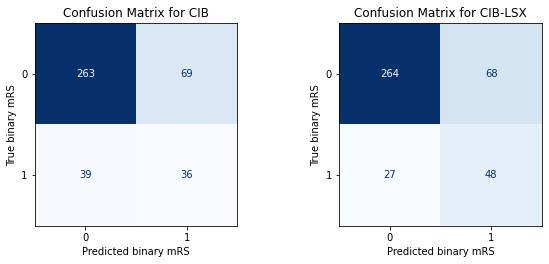

In [34]:
# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the first confusion matrix and manually handle the color bar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cax1 = disp.plot(cmap=plt.cm.Blues, ax=ax1)
cax1.im_.colorbar.remove()  # Manually remove the color bar
ax1.set_title('Confusion Matrix for CIB')
ax1.set_xlabel('Predicted binary mRS') 
ax1.set_ylabel('True binary mRS')  

# Display the second confusion matrix and manually handle the color bar
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
cax2 = disp2.plot(cmap=plt.cm.Blues, ax=ax2)
cax2.im_.colorbar.remove()  # Manually remove the color bar
ax2.set_title('Confusion Matrix for CIB-LSX')
ax2.set_xlabel('Predicted binary mRS') 
ax2.set_ylabel('True binary mRS')  

plt.savefig("/tf/notebooks/schnemau/xAI_stroke_3d/data/confusion_matrices.png", dpi=300)

# Show the plot
plt.show()

# 2 Training plots

## CIB-LSX

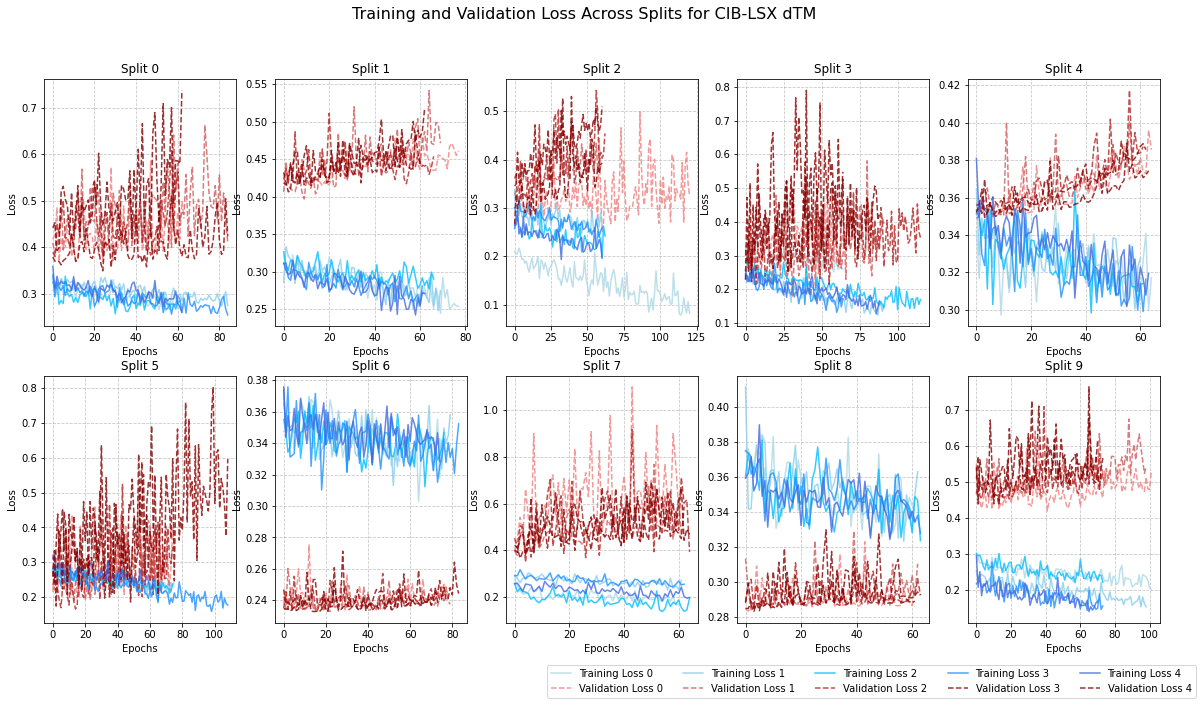

In [36]:
import matplotlib.pyplot as plt
import pickle as pkl

# Create subplots for all 10 splits
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Define shades of blue for training loss
train_loss_colors = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'royalblue']

# Define shades of red for validation loss
val_loss_colors = ['lightcoral', 'indianred', 'firebrick', 'darkred', 'maroon']

for which_split in range(10):
    # Determine subplot indices
    row, col = divmod(which_split, 5)

    # Access the current subplot
    ax = axs[row, col]

    # Iterate over models
    for i in range(5):
        model_name = f"/tf/notebooks/schnemau/xAI_stroke_3d/weights/10Fold_CIBLSX/hist_3D_CNN_avg_layer_binary_outcome_CIBLSX_split{which_split}_ens{i}_M6.pkl"
        # Load training history
        with open(model_name, "rb") as file:
            histplt = pkl.load(file)

        # Plot training history lines with different shades of blue for training loss
        ax.plot(histplt['loss'], label=f"Training Loss {i}", color=train_loss_colors[i], linestyle='-', alpha=0.8)
        
        # Plot validation history lines with different shades of red for validation loss
        ax.plot(histplt['val_loss'], label=f"Validation Loss {i}", color=val_loss_colors[i], linestyle='--', alpha=0.8)

    # Set plot labels and title for each subplot
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.set_title(f"Split {which_split}")

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)

# Add a title for the entire graph
fig.suptitle("Training and Validation Loss Across Splits for CIB-LSX dTM", fontsize=16)

# Add legend to the last subplot with adjusted location and layout
ax.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), fancybox=True, ncol=5)

#plt.savefig("/tf/notebooks/schnemau/xAI_stroke_3d/data/training_ciblsx.png", dpi=300)

# Display the plot
plt.show()

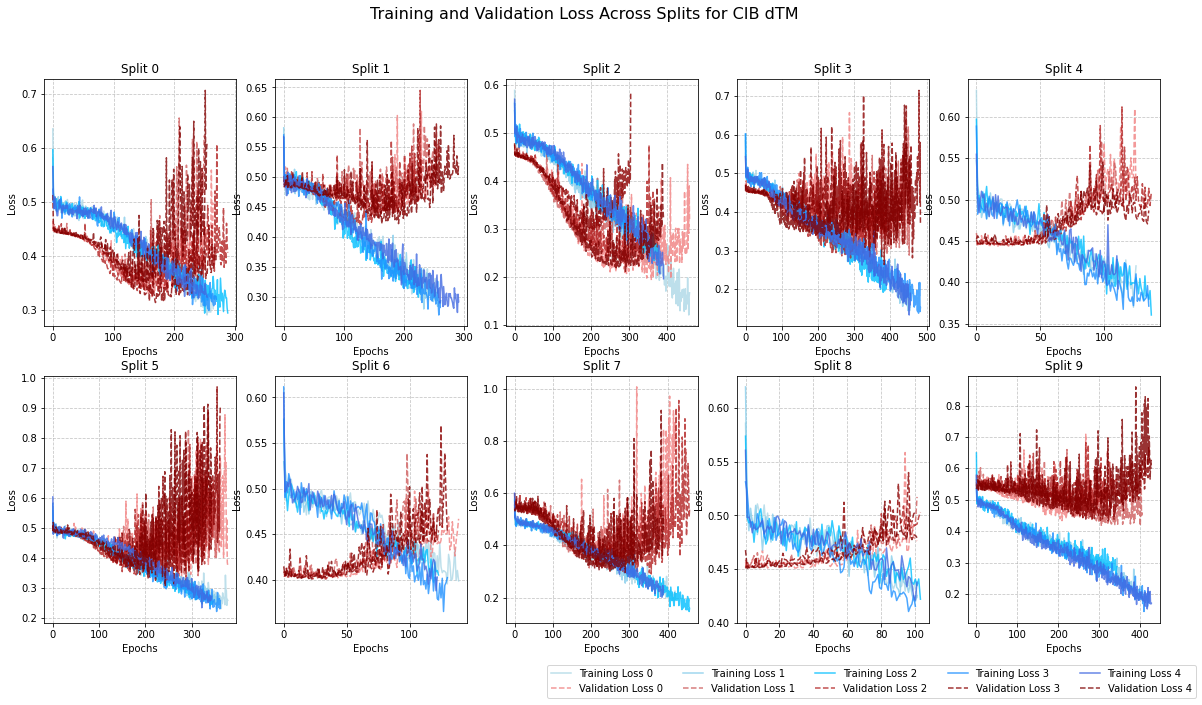

In [39]:
import matplotlib.pyplot as plt
import pickle as pkl

# Create subplots for all 10 splits
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Define shades of blue for training loss
train_loss_colors = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'royalblue']

# Define shades of red for validation loss
val_loss_colors = ['lightcoral', 'indianred', 'firebrick', 'darkred', 'maroon']

for which_split in range(10):
    # Determine subplot indices
    row, col = divmod(which_split, 5)

    # Access the current subplot
    ax = axs[row, col]

    # Iterate over models
    for i in range(5):
        model_name = f"/tf/notebooks/schnemau/xAI_stroke_3d/weights/10Fold_CIB/hist_3D_CNN_avg_layer_binary_outcome_CIB_split{which_split}_ens{i}_M2.pkl"
        # Load training history
        with open(model_name, "rb") as file:
            histplt = pkl.load(file)

        # Plot training history lines with different shades of blue for training loss
        ax.plot(histplt['loss'], label=f"Training Loss {i}", color=train_loss_colors[i], linestyle='-', alpha=0.8)
        
        # Plot validation history lines with different shades of red for validation loss
        ax.plot(histplt['val_loss'], label=f"Validation Loss {i}", color=val_loss_colors[i], linestyle='--', alpha=0.8)

    # Set plot labels and title for each subplot
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.set_title(f"Split {which_split}")

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)

# Add a title for the entire graph
fig.suptitle("Training and Validation Loss Across Splits for CIB dTM", fontsize=16)

# Add legend to the last subplot with adjusted location and layout
ax.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), fancybox=True, ncol=5)

plt.savefig("/tf/notebooks/schnemau/xAI_stroke_3d/data/training_cib.png", dpi=300)

# Display the plot
plt.show()

# 3 ROC-Curve

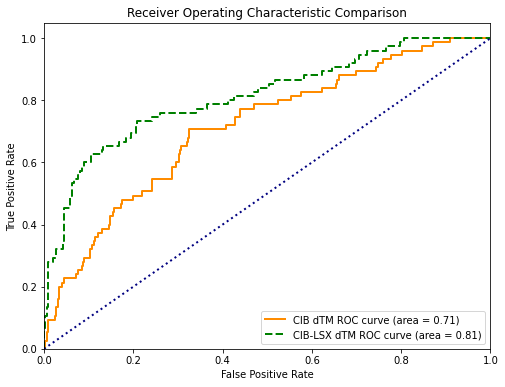

In [46]:
# Compute ROC curve and ROC area
fpr1, tpr1, thresholds1 = roc_curve(merged_df['unfavorable_ciblsx'], merged_df["y_pred_trafo_avg_w_cib"])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(merged_df['unfavorable_ciblsx'], merged_df["y_pred_trafo_avg_w_ciblsx"])
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='CIB dTM ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, linestyle='--', label='CIB-LSX dTM ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")

plt.savefig("/tf/notebooks/schnemau/xAI_stroke_3d/data/ROCdtm.png", dpi=300)

plt.show()

# 4 Calibration Plots

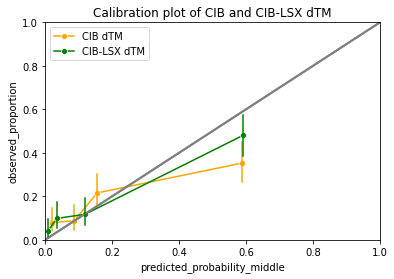

In [5]:
cal_plot_trafo_cib = fm.cal_plot_data_prep(merged_df["y_pred_trafo_avg_w_cib"], merged_df['unfavorable_cib'])
cal_plot_trafo_cibslsx = fm.cal_plot_data_prep(merged_df["y_pred_trafo_avg_w_ciblsx"], merged_df['unfavorable_ciblsx'])

fm.cal_plot(cal_plot_trafo_cib, "predicted_probability_middle", "observed_proportion",
                        "observed_proportion_lower", "observed_proportion_upper", col = "orange", show = False, label="CIB dTM")

fm.cal_plot(cal_plot_trafo_cibslsx, "predicted_probability_middle", "observed_proportion",
                        "observed_proportion_lower", "observed_proportion_upper", col = "green", label="CIB-LSX dTM")



# Grave

## Comparison of class 1 probabilities

### equal weighted CIB vs CIB_LSX

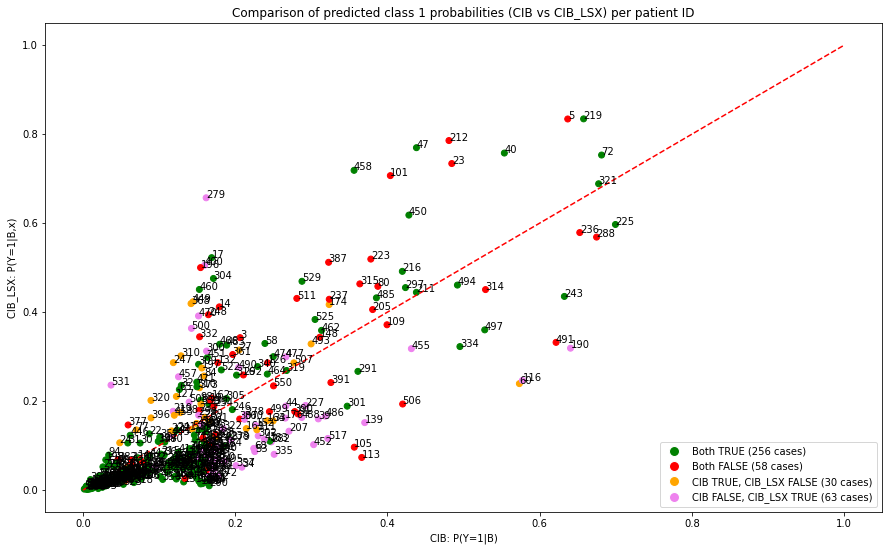

In [26]:
# Merge dataframes on 'p_id'
merged_df = pd.merge(cib, ciblsx, on='p_id', suffixes=('_cib', '_ciblsx'))

# Increase the figure size
plt.figure(figsize=(15, 9))

# Define colors based on conditions
colors = np.where((merged_df['pred_correct_cib'] & merged_df['pred_correct_ciblsx']), 'green',
                  np.where(~(merged_df['pred_correct_cib'] | merged_df['pred_correct_ciblsx']), 'red',
                           np.where((merged_df['pred_correct_cib'] & ~merged_df['pred_correct_ciblsx']), 'orange',
                                    np.where((~merged_df['pred_correct_cib'] & merged_df['pred_correct_ciblsx']), 'violet', 'gray'))))

# Scatter plot with colors
scatter = plt.scatter(merged_df['y_pred_trafo_avg_cib'], merged_df['y_pred_trafo_avg_ciblsx'],
                      label='Cib vs Ciblsx', marker='o', color=colors)

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID with equal weights')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_cib'][i], merged_df['y_pred_trafo_avg_ciblsx'][i]))

# Create legend with count
legend_labels = {
    'Green': f'Both TRUE ({np.sum(merged_df["pred_correct_cib"] & merged_df["pred_correct_ciblsx"])} cases)',
    'Red': f'Both FALSE ({np.sum(~(merged_df["pred_correct_cib"] | merged_df["pred_correct_ciblsx"]))} cases)',
    'Orange': f'CIB TRUE, CIB_LSX FALSE ({np.sum(merged_df["pred_correct_cib"] & ~merged_df["pred_correct_ciblsx"])} cases)',
    'Violet': f'CIB FALSE, CIB_LSX TRUE ({np.sum(~merged_df["pred_correct_cib"] & merged_df["pred_correct_ciblsx"])} cases)'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for color, label in legend_labels.items()]

plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()

In [25]:
# Erstellen der Kreuztabelle
cross_tab = pd.crosstab(merged_df['y_pred_class_avg_cib'], merged_df['y_pred_class_avg_ciblsx'], margins=True, margins_name="Total")

# Prozentuale Anteile berechnen
cross_tab_percent = cross_tab / cross_tab.loc["Total", "Total"] * 100

# Ausgabe der Kreuztabelle
print("Cross-tabulation of Predicted Classes:")
print(cross_tab)


Cross-tabulation of Predicted Classes:
y_pred_class_avg_ciblsx    0    1  Total
y_pred_class_avg_cib                    
0                        242   33    275
1                         60   72    132
Total                    302  105    407


### tuned weighted CIB vs CIB_LSX

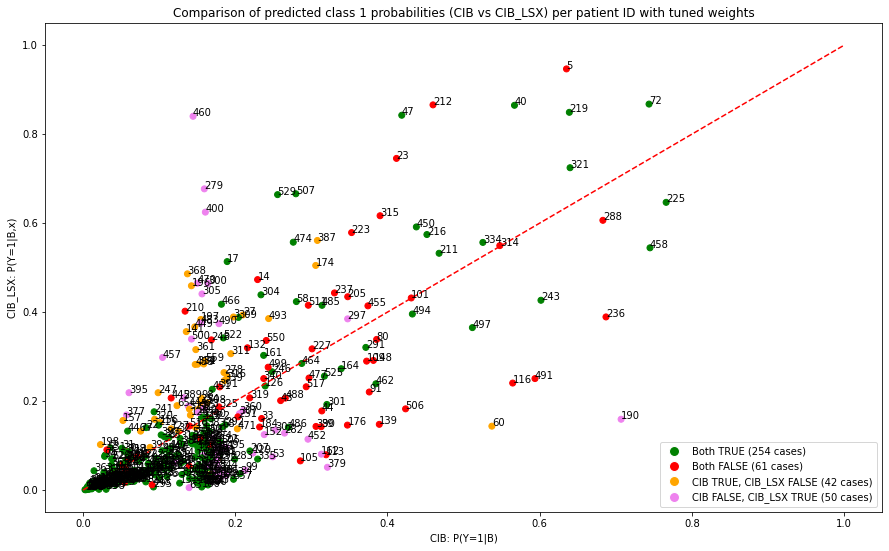

In [39]:
# Increase the figure size
plt.figure(figsize=(15, 9))

# Define colors based on conditions
colors = np.where((merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'green',
                  np.where(~(merged_df['pred_correct_w_cib'] | merged_df['pred_correct_w_ciblsx']), 'red',
                           np.where((merged_df['pred_correct_w_cib'] & ~merged_df['pred_correct_w_ciblsx']), 'orange',
                                    np.where((~merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'violet', 'gray'))))

# Scatter plot with colors
scatter = plt.scatter(merged_df['y_pred_trafo_avg_w_cib'], merged_df['y_pred_trafo_avg_w_ciblsx'],
                      label='weighted Cib vs Ciblsx', marker='o', color=colors)

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID with tuned weights')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_w_cib'][i], merged_df['y_pred_trafo_avg_w_ciblsx'][i]))

# Create legend with count
legend_labels = {
    'Green': f'Both TRUE ({np.sum(merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)',
    'Red': f'Both FALSE ({np.sum(~(merged_df["pred_correct_w_cib"] | merged_df["pred_correct_w_ciblsx"]))} cases)',
    'Orange': f'CIB TRUE, CIB_LSX FALSE ({np.sum(merged_df["pred_correct_w_cib"] & ~merged_df["pred_correct_w_ciblsx"])} cases)',
    'Violet': f'CIB FALSE, CIB_LSX TRUE ({np.sum(~merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for color, label in legend_labels.items()]

plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()

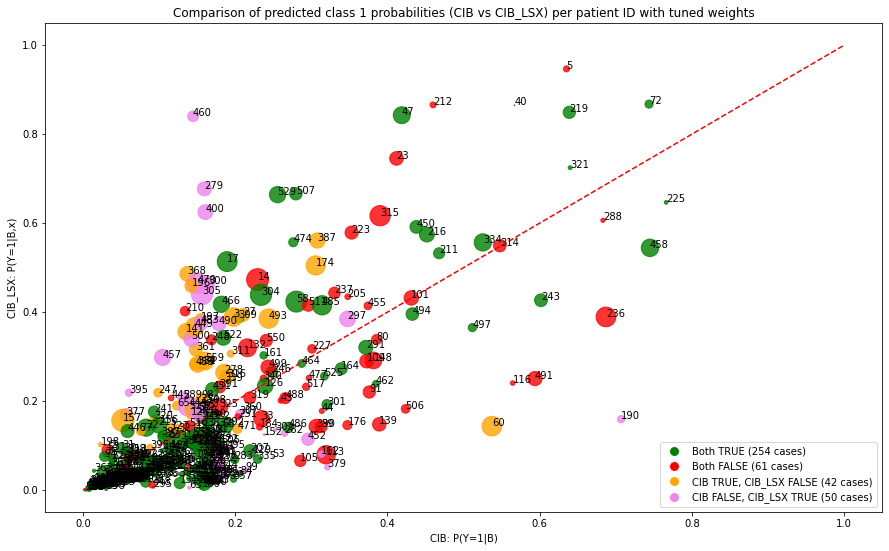

In [56]:
# Increase the figure size
plt.figure(figsize=(15, 9))

# Define colors based on conditions
colors = np.where((merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'green',
                  np.where(~(merged_df['pred_correct_w_cib'] | merged_df['pred_correct_w_ciblsx']), 'red',
                           np.where((merged_df['pred_correct_w_cib'] & ~merged_df['pred_correct_w_ciblsx']), 'orange',
                                    np.where((~merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'violet', 'gray'))))

# Scatter plot with size based on uncertainties
scatter = plt.scatter(merged_df['y_pred_trafo_avg_w_cib'], merged_df['y_pred_trafo_avg_w_ciblsx'],
                      label='weighted Cib vs Ciblsx', marker='o', c=colors, s=merged_df['y_pred_unc_w_ciblsx'] * 500, alpha=0.8)

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID with tuned weights')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')


# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_w_cib'][i], merged_df['y_pred_trafo_avg_w_ciblsx'][i]))

# Create legend with count
legend_labels = {
    'Green': f'Both TRUE ({np.sum(merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)',
    'Red': f'Both FALSE ({np.sum(~(merged_df["pred_correct_w_cib"] | merged_df["pred_correct_w_ciblsx"]))} cases)',
    'Orange': f'CIB TRUE, CIB_LSX FALSE ({np.sum(merged_df["pred_correct_w_cib"] & ~merged_df["pred_correct_w_ciblsx"])} cases)',
    'Violet': f'CIB FALSE, CIB_LSX TRUE ({np.sum(~merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for color, label in legend_labels.items()]

plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()


### equal weighted CIB_LSX vs. tuned weighted CIB_LSX 

Cross-tabulation of Predicted Classes:
y_pred_class_avg_w_ciblsx    0    1  Total
y_pred_class_avg_ciblsx                   
0                          265   37    302
1                           16   89    105
Total                      281  126    407

Cross-tabulation of Predicted Classes (Percentage):
y_pred_class_avg_w_ciblsx          0          1       Total
y_pred_class_avg_ciblsx                                    
0                          65.110565   9.090909   74.201474
1                           3.931204  21.867322   25.798526
Total                      69.041769  30.958231  100.000000


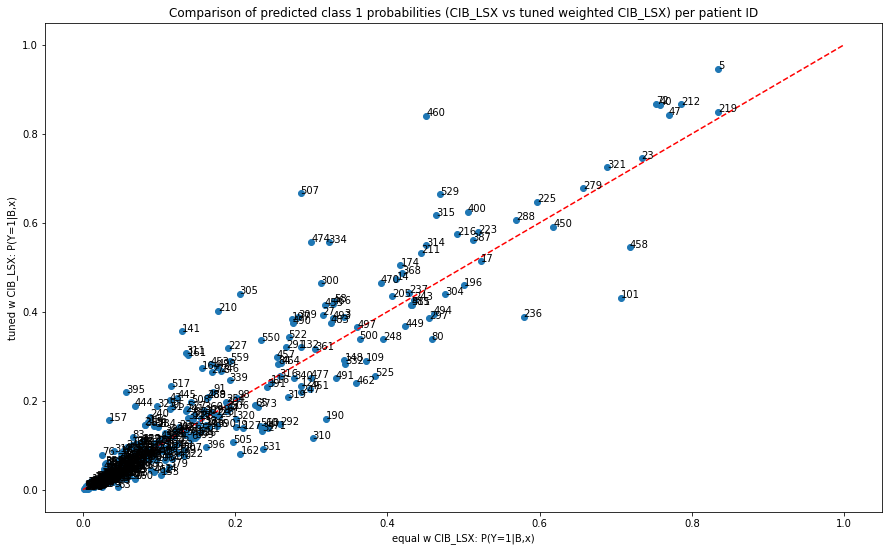

In [69]:
# Increase the figure size
plt.figure(figsize=(15, 9))

# Scatter plot
plt.scatter(merged_df['y_pred_trafo_avg_ciblsx'], merged_df['y_pred_trafo_avg_w_ciblsx'], label='CIB_LSX vs Tuned CIB_LSX', marker='o')

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB_LSX vs tuned weighted CIB_LSX) per patient ID')
plt.xlabel('equal w CIB_LSX: P(Y=1|B,x)')
plt.ylabel('tuned w CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_ciblsx'][i], merged_df['y_pred_trafo_avg_w_ciblsx'][i]))


# Erstellen der Kreuztabelle
cross_tab = pd.crosstab(merged_df['y_pred_class_avg_ciblsx'], merged_df['y_pred_class_avg_w_ciblsx'], margins=True, margins_name="Total")

# Prozentuale Anteile berechnen
cross_tab_percent = cross_tab / cross_tab.loc["Total", "Total"] * 100

# Ausgabe der Kreuztabelle
print("Cross-tabulation of Predicted Classes:")
print(cross_tab)
print("\nCross-tabulation of Predicted Classes (Percentage):")
print(cross_tab_percent)

### equal weighted CIB vs. tuned weighted CIB 

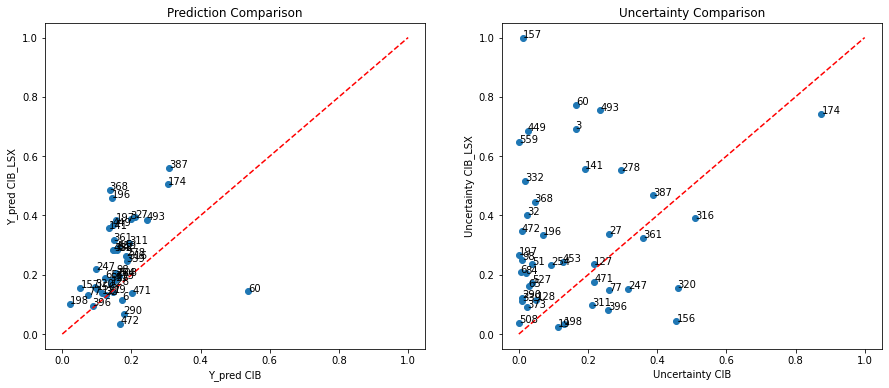

In [84]:
subset_df = merged_df[(merged_df['pred_correct_w_cib'] == True) & (merged_df['pred_correct_w_ciblsx'] == False)]
# Resetting the index of the subset DataFrame
subset_df = subset_df.reset_index(drop=True)

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot for y_pred
axs[0].scatter(subset_df['y_pred_trafo_avg_w_cib'], subset_df['y_pred_trafo_avg_w_ciblsx'])
axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0].set_title('Prediction Comparison')
axs[0].set_xlabel('Y_pred CIB')
axs[0].set_ylabel('Y_pred CIB_LSX')

# Plot 2: Scatter plot for uncertainties
axs[1].scatter(subset_df['y_pred_unc_w_cib'], subset_df['y_pred_unc_w_ciblsx'])
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_title('Uncertainty Comparison')
axs[1].set_xlabel('Uncertainty CIB')
axs[1].set_ylabel('Uncertainty CIB_LSX')

# Add patient IDs to the points
for i, txt in enumerate(subset_df['p_id']):
    axs[0].annotate(txt, (subset_df['y_pred_trafo_avg_w_cib'][i], subset_df['y_pred_trafo_avg_w_ciblsx'][i]))
    axs[1].annotate(txt, (subset_df['y_pred_unc_w_cib'][i], subset_df['y_pred_unc_w_ciblsx'][i]))

# Show the plots
plt.show()

In [85]:
print(np.mean(subset_df['y_pred_unc_w_cib']))
print(np.mean(subset_df['y_pred_unc_w_ciblsx']))

0.16049391705872734
0.32332564106757866


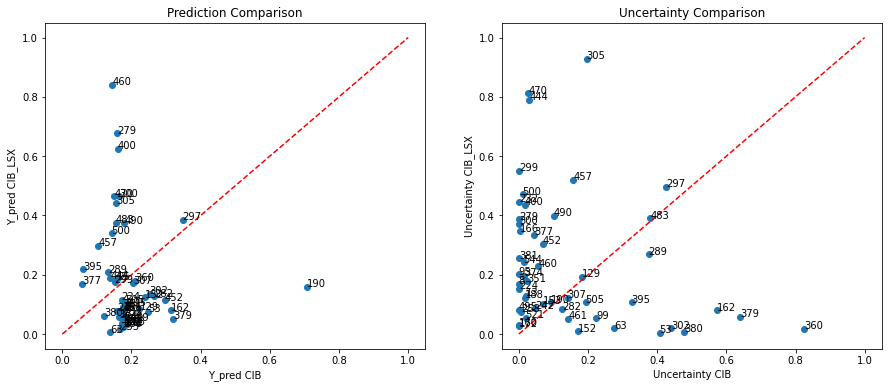

In [86]:
subset_df = merged_df[(merged_df['pred_correct_w_cib'] == False) & (merged_df['pred_correct_w_ciblsx'] == True)]
# Resetting the index of the subset DataFrame
subset_df = subset_df.reset_index(drop=True)

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot for y_pred
axs[0].scatter(subset_df['y_pred_trafo_avg_w_cib'], subset_df['y_pred_trafo_avg_w_ciblsx'])
axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0].set_title('Prediction Comparison')
axs[0].set_xlabel('Y_pred CIB')
axs[0].set_ylabel('Y_pred CIB_LSX')

# Plot 2: Scatter plot for uncertainties
axs[1].scatter(subset_df['y_pred_unc_w_cib'], subset_df['y_pred_unc_w_ciblsx'])
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_title('Uncertainty Comparison')
axs[1].set_xlabel('Uncertainty CIB')
axs[1].set_ylabel('Uncertainty CIB_LSX')


# Add patient IDs to the points
for i, txt in enumerate(subset_df['p_id']):
    axs[0].annotate(txt, (subset_df['y_pred_trafo_avg_w_cib'][i], subset_df['y_pred_trafo_avg_w_ciblsx'][i]))
    axs[1].annotate(txt, (subset_df['y_pred_unc_w_cib'][i], subset_df['y_pred_unc_w_ciblsx'][i]))


# Show the plots
plt.show()

In [83]:
print(np.mean(subset_df['y_pred_unc_w_cib']))
print(np.mean(subset_df['y_pred_unc_w_ciblsx']))

0.14727608091687178
0.23265723207303765
